<h1><center>Распознавание лиц и  эмоций</center></h1>

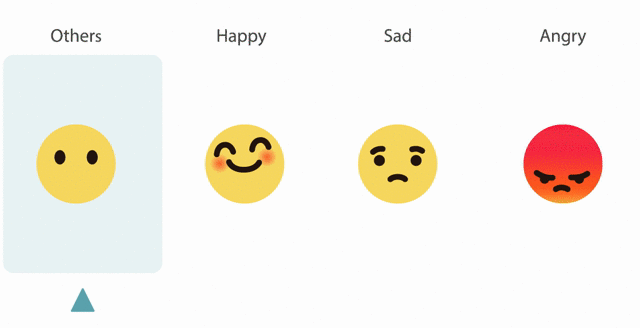

# План занятия

* Эмоция
* Детектирование лиц
* Распознавание эмоций
* Подготовка датасета и обучение
* Проверка результатов
* Построение пайплайна распознавания эмоций
* Заключение

<h1><center>Теория</center></h1>

На сколько нам известно, эмоции играют важную роль в нашей жизни. Нам нужна система, которая ведет себя нужным образом в зависимости от нашего поведения и эмоций.
Такие IT гиганты как Apple, Google, Amazon пытаются сделать их виртуалных ассистентов Siri, Google Assistant, Alexa больше похожих на людей. Эти компании проводят масштабные исследования и разработки, чтобы сделать свои виртуальные помощники более гуманными благодаря ИИ. Идея состоит в том, чтобы объединить цифровых помощников с моделью машинного обучения, которая способна определять эмоции лица человека и учитывать эту информацию в своих действиях.

## Эмоция

На данный момент нет эталоной меры для определения эмоции. Все чем мы можем оперировать в этом вопросе - это внешними признаками, по которым мы определяем какая у человека эмоция. Если в будущем появится технология с помощью которой мы сможем заглянуть в мозг человека и распознать определенную его схему, по которой и запускаются все эмоции - тогда и появится эталон для поределения что же такое эмоция. Но  мы попробуем. Если мы посмотрим в википедию, то найдем следующее определение:

Эмоция - это биологическое состояние нервной системы, вызваное нейрофизиологическими изменениями, которые по-разному связаны с мыслями, чувствами, поведенчискими реакциями и степенью  удовольствия или неудовольствия. Обширно, но вроде понятно. Но зачем людям понадобился такой механизм. Как нам говорит российский физиолог П.К. Анохин в своей теории, способность испытывать эмоции была выработана в процессе эволюции как средство более успешной адаптации живых существ к условиям существования. Эмоция оказалась полезной для выживаемости и позволила живым существам быстро и наиболее экономно реагировать на внешние воздействия. Таким образом, с помощью эмоций можно было очень легко передавать важную информацию от человека к человеку.

В нашем общении эмоции и вправду занимают огромную роль. При этом их можно выразить по-разному: мимика, голос, поза, двигательные и вегетативные(артериальное давление, частота дыхания, частота биения сердца) реакции. При этом мы все можем понять и по выражению лица.

Предствители разных культур одни и те же эмоции могут выражать по-разному. В 70-х годах известный психолог [Пол Экман](https://www.youtube.com/watch?v=X4KfdomhIIo) исследовал невербальное общение изолированных племен в Папуа-Новой Гвинее. В ходе [исследования](https://www.ekmaninternational.com/a-brief-history-into-paul-ekmans-early-research/) он установил, что определенные эмоции являются универсальными и каждый человек может их понять, независимо от его культуры. Это следующие семь эмоций: гнев, страх, печаль, отвращение, презрение, удивление и радость.
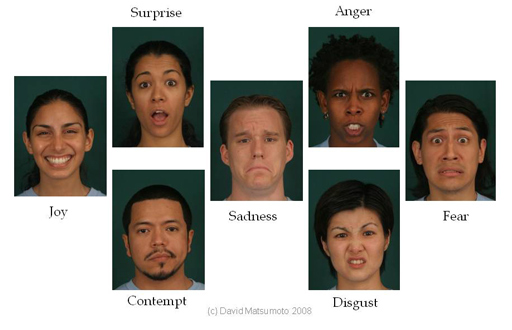
 

Давайте попробуем разобраться в алгоритме распознавания эмоций лица человека по изображению.

## Детектирование лиц

Для начала нам нужно найти на изображении лицо человека. Что ж, детекция лиц давно уже вышла из аккадемии в большой бизнес. И здесь, как и в любом бизнесе, производители стремятся доказать, что их алгоритмы лучше, но не всегда предоставляют данные открытого тестирования. К примеру, на конкурсе [MegaFace](https://old.sk.ru/news/b/news/archive/2017/05/11/vokord-vnov-pobedil-v-mirovom-konkurse-raspoznavaniya-lic.aspx) на данный момент лучшую точность показывает российский алгоритм deepVo V3 компании Вокорд с результатом 92%.  FaceNet v8 в этом же конкурсе показывает всего 70%, а DeepFace от Facebook с заявленной точностью в 97% в конкурсе вовсе не участвовал. Чиать такие цифры стоит с острожностью. Тем не менее, мы видим что лучшие алгоритмы очень близки к человеческой точности распознавания лиц.

Тема детектирования лиц очень обширна и вряд ли укладывается в рамки одного вебинара. Поэтому предлагаю взять уже готовое решение, которое предсталяет PyTorch в библиотеке [facenet-pytorch](https://github.com/timesler/facenet-pytorch). В ней представлены наиболее удачные архитектуры сетей, которые могут детектировать и распознавать лица. В их число входят каскадная нейронная сеть MTCNN для детектирования лиц и Inception ResNet для распознавания найденных лиц. 

Давайте разберем, как MTCNN работает. 

В многозадачной каскадной нейронной сети ([Multi-task Cascaded Convolutional Networks](https://arxiv.org/pdf/1604.02878.pdf)), обнаружение лица и выравнивание лица выполняются совместно, в многозадачном режиме. Это позволяет модели лучше определять лица, которые изначально не выровнены. Процесс состоит из стрех стадий сверточных сетей, которые могут распознать лица и такие особенные точки как глаза, нос и рот. В первой стадии используется поверхностаная сверточная сеть для быстрого создания окон-кандидатов. Во второй стадии уточняется предложенные кона-кандидаты с помощью более сложной сверточной сети. И в конце используется еще более сложная сеть для дальнейшего уточнения результата и вывода позиций особенных точек лица. 

## Три стадии MTCNN

Шаг 1. Сеть предложения (Proposal Network, P-Net)

Первый шаг - взять изображение и изменить его размер до различных масштабов, чтобы построить пирамиду изображений, которая является входом для следующей трехступенчатой каскадной сети.
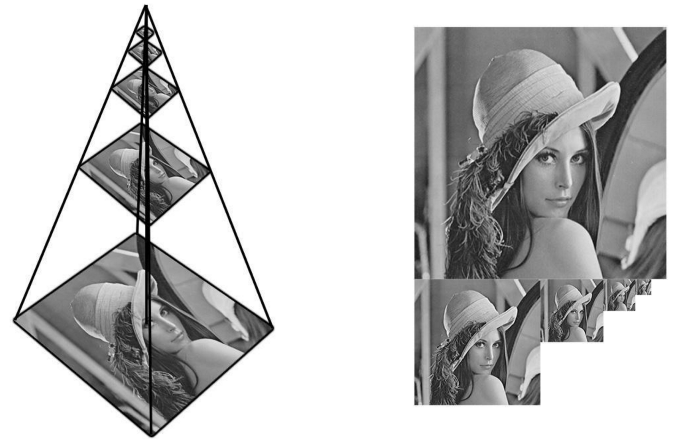

Это делается с помощью полносвязной сверточной сети (FCN). Разница между CNN и FCN в том, что полносвязная сверточная сеть не использует полносвязный Dence слой как часть архитектуры. Эта сеть предложения используется для получения окон-кандидатов и их вектора полученного в результате метода bounding box regression.

bounding box regression - популярная техника предсказывания нахождения обрамляющего прямоугольника, когда цель в детектировании объекта некоторого предопределенного класса(в нашем лучае это лица). После получения векторов обрамляющего прямоугольника выполняется некоторое уточнение для объединения перекрывающихся регионов. Конечным результатом этого этапа являются все окна-кадидаты после уточнения для уменьшения количества кандидатов.
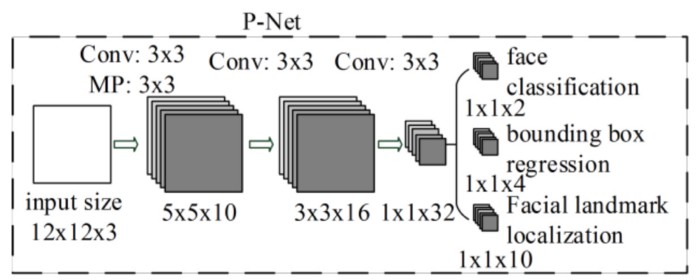

Шаг 2. Уточняющая сеть (Refine Network, R-Net)

Все кандидаты из P-net подаются в уточняющую сеть. Обратите внимание, что эта сеть CNN а не FCN. R-Net дополнительно сокращает количество кандидатов, выполняет калибровку с регрессией ограничивающей рамки и использует NMS чтобы объединить совпадающих кандидатов.

R-Net выводит, является ли ввод лицом или нет, 4-элементный вектор, который является обрамляющей рамкой для лица, и 10-элементный вектор для локализации лицевых особенных точек.
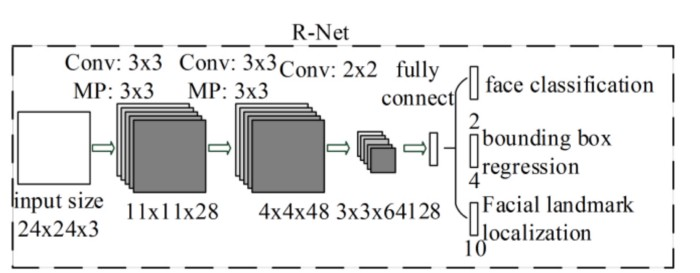

Шаг 3. Выходная сеть (Output Network, O-Net)

Этот этап аналогичен R-Net, но эта сеть вывода нацелена на более подробное описание лица и вывод положений пяти лицевых особенных точек для глаз, носа и рта.
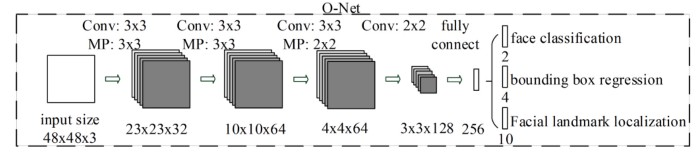

Задача всей сети состоит в том, чтобы вывести три вещи: классификацию лицо/не лицо, регрессию обрамляющей рамки и локализацию лицевых особенных точек.

## Распознавание эмоций

----

В качестве архитектуры для распознавания эмоций возьмем вариацию на тему [ResNet9](https://medium.com/swlh/natural-image-classification-using-resnet9-model-6f9dc924cd6d). В задаче распознавания эмоций изображений лица наиболее хорошие результаты показывают сверточные архитектуры. Они хорошо справляются с задачей нахождения особенных точек на лице и интерпретацией их расположения между собой.




<h1><center>Практика</center></h1>

Загрузим все необходимые библиотеки

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
import time
from torch.autograd import Variable

Шаг 1. Подготовка данных

Создадим объекты для необходимых трансформаций нашего датасета:

In [2]:
 
train_tfms = tt.Compose([tt.Grayscale(num_output_channels=1), # Картинки чернобелые
                         # Настройки для расширения датасета
                         tt.RandomHorizontalFlip(),           # Случайные повороты на 90 градусов
                         tt.RandomRotation(30),               # Случайные повороты на 30 градусов
                         tt.ToTensor()])                      # Приведение к тензору

test_tfms = tt.Compose([tt.Grayscale(num_output_channels=1), tt.ToTensor()])

Для обучения нейронной сети будем использовать этот [датасет](https://www.kaggle.com/chiragsoni/ferdata?) (54 MB).
Загрузим его и распакуем содержимое в папку 'Emotion_recognition'.

Видим, что внутри две папки с тестовыми и тренировочными картинками:

In [3]:
data_dir = './Emotion_recognition'
print(os.listdir(data_dir))

['test', 'train']


Если посмотрим что в них, то у видим 7 папок. Каждая под один из 7 классов эмоций:

In [4]:
classes_train = os.listdir(data_dir + "/train")
classes_test = os.listdir(data_dir + "/test")
print(f'Train Classes - {classes_train}')
print(f'test Classes - {classes_test}')

Train Classes - ['sad', 'disgust', 'happy', 'surprise', 'neutral', 'fear', 'angry']
test Classes - ['sad', 'disgust', 'happy', 'surprise', 'neutral', 'fear', 'angry']


In [5]:
def digit_to_classname(digit):
    if digit == 0:
        return 'sad'
    elif digit == 1:
        return 'disgust'
    elif digit == 2:
        return 'happy'
    elif digit == 3:
        return 'surprise'
    elif digit == 4:
        return 'neutral'
    elif digit == 5:
        return 'fear'
    elif digit == 6:
        return 'angry'

Используем ImageFolder для каждой выборки:

In [6]:
train_ds = ImageFolder(data_dir + '/train', train_tfms)
test_ds = ImageFolder(data_dir + '/test', test_tfms)

In [7]:
train_ds

Dataset ImageFolder
    Number of datapoints: 28709
    Root location: ./Emotion_recognition/train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=(-30, 30), resample=False, expand=False)
               ToTensor()
           )

Определим размер батча:

In [8]:
batch_size = 200

И создадим наши даталоадеры:

In [9]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, num_workers=3, pin_memory=True)

Создадим функцию для просмотра случайных картинок из получившегося датасета:

In [10]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        print(images[0].shape)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

torch.Size([1, 48, 48])


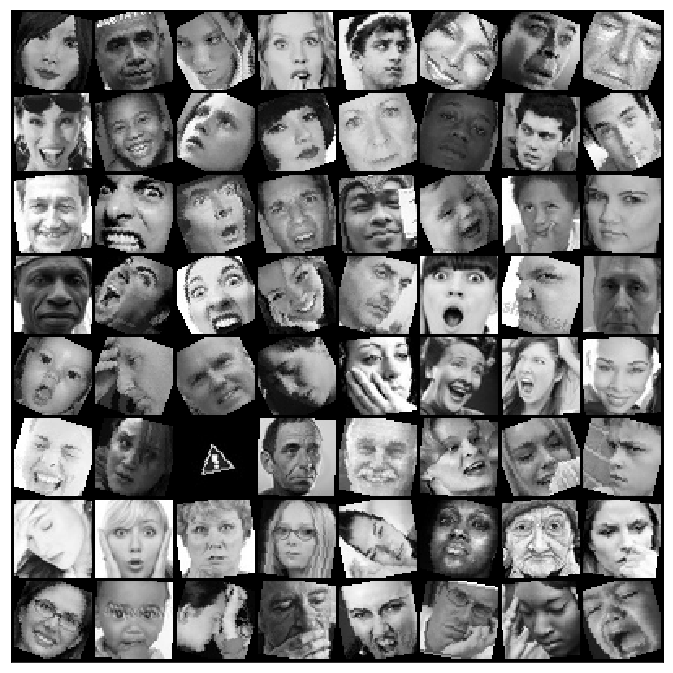

In [11]:
show_batch(train_dl)

Напишем функции для перевода наших Даталоадеров на необходимое оборудование:

In [12]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

Узнаем какое оборудование у нас:

In [13]:
device = get_default_device()
device

device(type='cuda')

Воспользуемся функциями написанными выше:

In [14]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

Шаг 2. Опишем модель

Опишем нашу модель для распознавания эмоций:

In [15]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ELU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128)
        self.conv2 = conv_block(128, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv3 = conv_block(128, 256)
        self.conv4 = conv_block(256, 256, pool=True)
        self.res2 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv5 = conv_block(256, 512)
        self.conv6 = conv_block(512, 512, pool=True)
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.drop3 = nn.Dropout(0.5)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.drop3(out)
        
        out = self.classifier(out)
        return out

Давайте я дам некоторые пояснения по поводу использования того или иного слоя.

BatchNorm2d - вывод со сверточного слоя может быть довольно большим, что может негативно повлиять на нашу модель. А этот слой просто нормализует полученные данные.

ELU - можно использовать и Relu, но ELU быстрее стремится к нулю.

In [62]:
model = to_device(ResNet(1, len(classes_train)), device)

In [19]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

Шаг 3. Обучение

In [25]:
torch.cuda.empty_cache()
history = []

epochs = 24
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
optimizer = torch.optim.Adam(model.parameters(), max_lr, weight_decay=weight_decay)

In [26]:
total_steps = len(train_dl)
print(f'{epochs} epochs, {total_steps} total_steps per epoch')

24 epochs, 28709 total_steps per epoch


In [27]:
epoch_losses = []

for epoch in range(epochs):
    
    time1 = time.time()
    running_loss = 0.0
    epoch_loss = []
    for batch_idx, (data, labels) in enumerate(train_dl):
        data, labels = Variable(data), Variable(labels)
        data = data.cuda()
        labels = labels.cuda()
        
        
        optimizer.zero_grad()
        
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        epoch_loss.append(loss.item())
        if (batch_idx+1) % 10000 == 9999:
            print(f'Train Epoch: {epoch+1}, Loss: {running_loss/10000}')
            time2 = time.time()
            print(f'Spend time for 10000 images: {time2 - time1} sec')
            time1 = time.time()
            running_loss = 0.0
    print(f'Epoch {epoch+1}, loss: ', np.mean(epoch_loss))
    epoch_losses.append(epoch_loss)
    

Train Epoch: 1, Loss: 1.8591553693652152
Spend time for 10000 images: 84.86982750892639 sec
Train Epoch: 1, Loss: 1.8615224136143922
Spend time for 10000 images: 82.01423859596252 sec
Epoch 1, loss:  1.857867608268772
Train Epoch: 2, Loss: 1.8530244106888771
Spend time for 10000 images: 80.76649928092957 sec
Train Epoch: 2, Loss: 1.8643508950650691
Spend time for 10000 images: 80.80629920959473 sec
Epoch 2, loss:  1.8627401150241658
Train Epoch: 3, Loss: 1.8583195706486701
Spend time for 10000 images: 81.10549283027649 sec
Train Epoch: 3, Loss: 1.8540309393584729
Spend time for 10000 images: 81.07429265975952 sec
Epoch 3, loss:  1.8565257557052826
Train Epoch: 4, Loss: 1.8632071084022521
Spend time for 10000 images: 80.89770722389221 sec
Train Epoch: 4, Loss: 1.8567157593846322
Spend time for 10000 images: 80.7642285823822 sec
Epoch 4, loss:  1.8614334176254312
Train Epoch: 5, Loss: 1.8604541410446167
Spend time for 10000 images: 81.09021735191345 sec
Train Epoch: 5, Loss: 1.8588391507

Посмотрим на нашу ошибку в процессе обучения:

Text(0.5, 1.0, 'losses vs. No. of epochs')

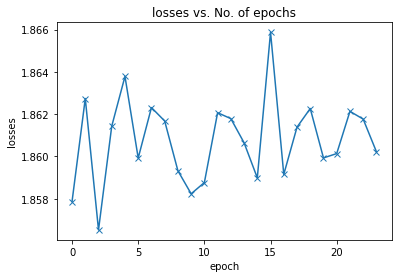

In [63]:
losses = [np.mean(loss) for loss in epoch_losses]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('losses vs. No. of epochs')

Сохраним нашу модель:

In [32]:
torch.save(model.state_dict(), './models/emotion_detection_model_state_1_batch.pth')

Теперь давайте загрузим ее и будем использовать:

In [33]:
net=ResNet(1, len(classes_train)).to(device)
net.load_state_dict(torch.load('./models/emotion_detection_model_state.pth'))
net.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

Прогоним нашу нейронную сеть через тестовый датасет:

/home/user/anaconda3/envs/yolov3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  after removing the cwd from sys.path.


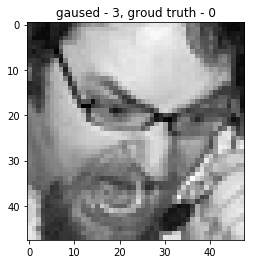

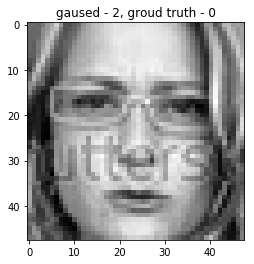

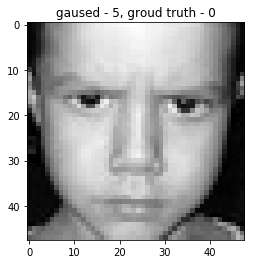

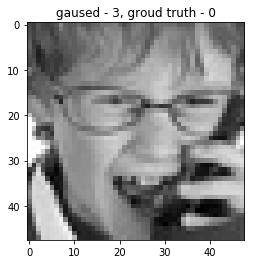

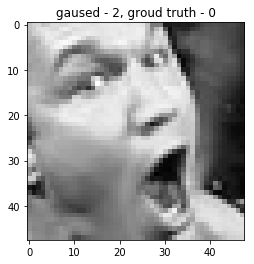

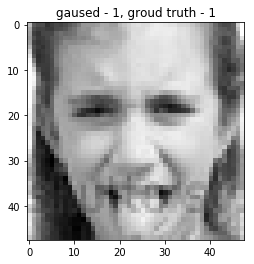

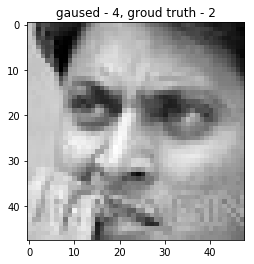

In [64]:
with torch.no_grad():
    for i, data in enumerate(test_dl):
        images, labels = data
        images, labels = Variable(images,volatile=True), Variable(labels,volatile=True)
        outputs = net(images)
        plt.title(f'gaused - {outputs[0].argmax()}, groud truth - {labels[0]}')
        plt.imshow(images[0].cpu().squeeze(), cmap='gray')
        plt.show()
        if i>5:
            break

Напишем скрипт, в котором мы построим пайплайн распознавания эмоций найденного лица с изображения. Здесь со своей вебкамеры я ловлю кадры. На каждом кадре я нахожу лица и для каждого лица определяю эмоцию. И все это рисую прямо на кадре и отображаю через cv2.imshow:

In [20]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN

cap = cv2.VideoCapture(0)  
    
class FaceDetector(object):
    """
    Face detector class
    """

    def __init__(self, mtcnn):
        self.mtcnn = mtcnn
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.emodel = ResNet(1, 7).to(self.device)
        self.emodel.load_state_dict(torch.load('./models/emotion_detection_model_state.pth'))
        self.emodel.eval()

    def _draw(self, frame, boxes, probs, landmarks, emotion):
        """
        Draw landmarks and boxes for each face detected
        """
        try:
            for box, prob, ld in zip(boxes, probs, landmarks):
                # Draw rectangle on frame
                cv2.rectangle(frame,
                              (box[0], box[1]),
                              (box[2], box[3]),
                              (0, 0, 255),
                              thickness=2)

                # Show probability
                cv2.putText(frame, 
                    emotion, (box[2], box[3]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

                # Draw landmarks
                cv2.circle(frame, tuple(ld[0]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[1]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[2]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[3]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[4]), 5, (0, 0, 255), -1)
        except:
            pass

        return frame
    
    @staticmethod
    def crop_faces(frame, boxes):
        faces = []
        for i, box in enumerate(boxes):
            faces.append(frame[int(box[1]):int(box[3]), 
                int(box[0]):int(box[2])])
        return faces
    
    @staticmethod
    def digit_to_classname(digit):
        if digit == 0:
            return 'sad'
        elif digit == 1:
            return 'disgust'
        elif digit == 2:
            return 'happy'
        elif digit == 3:
            return 'surprise'
        elif digit == 4:
            return 'neutral'
        elif digit == 5:
            return 'fear'
        elif digit == 6:
            return 'angry'
       

    def run(self):
        """
            Run the FaceDetector and draw landmarks and boxes around detected faces
        """                

        while True:
            ret, frame = cap.read()
            try:
                # detect face box, probability and landmarks
                boxes, probs, landmarks = self.mtcnn.detect(frame, landmarks=True)

                face = self.crop_faces(frame, boxes)[0]
                face = cv2.resize(face,(48,48))
                face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
                torch_face = torch.from_numpy(face).unsqueeze(0).to(self.device).float()
                emotion = self.emodel(torch_face[None, ...])
                emotion = self.digit_to_classname(emotion.argmax())

                # draw on frame
                self._draw(frame, boxes, probs, landmarks, emotion)

            except:
                pass

            # Show the frame
            cv2.imshow('Face Detection', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        
        
# Run the app
mtcnn = MTCNN()
fcd = FaceDetector(mtcnn)
fcd.run()